# WALK	: Web Archives for Longitudinal Research

"WALK will enable present and future humanities and social science scholars to access, interpret and curate born-digital primary resources that document our recent past."

This is a demo/tutorial for **Simon Fraser University** on our up-to-now explorations on Web Archives.

I have called this tool / library *Compare* because it uses Warcbase derivative data from the archives / WARC files.

Compare uses either Simple (CA) or Multiple Correspondence Analysis (MCA) to explore relationships among different collections of data. It is like factor analysis.  I have a demo of Simple CA [using parliamentary committees and MPs as a sample.](https://github.com/web-archive-group/WALK/blob/master/Scripts/compare_collection/UnderstandingMCA.ipynb). 


In [1]:
#First let's import the necessary libraries.
%matplotlib inline
from Compare import Compare # The Compare class
import os #file operations
from collections import defaultdict #complex dictionaries
import matplotlib.pyplot as plt #plotting library
from mpl_toolkits.mplot3d import Axes3D #for 3d graphs
import copy #need deepcopy() for working with the dictionaries.

####   Uncomment the items below if you want 
####   to use D3 for output.

#import mpld3
#mpld3.enable_notebook()


While many questions could be answered using MCA, we have decided to focus on a simple problem statement: ***Can we conduct an evaluation of a collection of web archives using data analytics?*** For this demo, I have included a number of collections:

- Three Twitter crawls.
- SFU collections (6 in all)

We have also included some dummy collections based on the most popular websites, categorized by media, social media, government, tech industry and NGOs.

While there are a number of ways we could compare the collections, this example will use web domain names (urls). Often MCA tries to compare both factors (collections *and* urls) but including the urls would be too difficult. (Besides, do we really need to understand why www.youtube.com is in multiple collections?)  The urls will be represented by off-white squares and no labels to keep them from confusing the analysis.

We assume that libraries will continue not to count format as a selection criteria, meaning that web archives are selected on the same criteria as books, journals or any other source. We have decided to focus on the following principles of collection management, however:

- Coverage / Scope
  + What are the best ways to evaluate coverage?
- Accuracy
  + Can we detect problems (eg. ineffective crawls)
- Relevance
  + Is a historian likely to find something unique or interesting in the collection?
- Dynamics
  + How has the collection changed from crawl to crawl?


In [7]:
# The output below takes the derivative files from the folder "UFT/" and puts them into a python dictionary (array)
# for later use.  I have included two of these. One including the Heritage Community Foundation's collection and one
# not.

path = "SFU/"

def processCollection (path):
    #initialise vars:
    urls = []
    #establish the data folder
    for filename in os.listdir(path):
        with open(path+filename, "r") as file:
            print (filename) #see the filenames available.
            urls.append(list({(filename[0:15], line.translate(str.maketrans(')'," ")).split(",")[0][2:6], line.translate(str.maketrans(')'," ")).split(",")[1].strip()) for line in file.readlines()}))
    return(urls)

#newdict = defaultdict(dict)
newdict = defaultdict(lambda: defaultdict(list))
newdict2 = defaultdict(lambda: defaultdict(list))
PC = processCollection(path)
#print(list(zip(PC[0])))
#print(list(zip(PC[0][0])))
#print (**collect)
for collect in PC:
    for coll, date, url in collect:
        newdict[date][coll].append(url)

# newdict will provide all the data like so:

#newdict2 eliminates collections in if-then statement.
for collect in PC:
    for coll, date, url in collect:
        if coll == 'ALBERTA_heritag' or coll=='DUMMY_GOVERNMEN' or coll == 'ALBERTA_hcf_onl' or coll=="DUMMY_MEDIA" or coll=="DUMMY" or coll== "ORGDUMMY" or coll== "TECHDUMMY" or coll== "SOCIALMEDIADUMM" or coll=="GOVDUMMY":
            pass
        else:
            newdict2[date][coll].append(url)

#{'DATE': {'COLLECTION': ['url1.com', 'url2.com', 'etc']}}
#

 

DUMMY
DUMMY_GOVERNMENT
DUMMY_MEDIA
ORGDUMMY
SFU_bc_local_government-urls.txt
SFU_government_of_canada-urls.txt
SFU_library_website-urls.txt
SFU_ngos-urls.txt
SFU_pkp-urls.txt
SFU_sfu_affiliated-urls.txt
SOCIALMEDIADUMMY
TECHDUMMY
WAHR_exln42-all
WAHR_panamapapers-urls
WAHR_ymmfire-urls


In [8]:
## Produce a dictionary output that creates a list of outputs suitable for analysis by date.
##
## collection_var[-1] would analyze all the links together until the latest year (2016). collection_var[-2]
## would analyze everything up to t-1 (2015).
##
## Our hope for the future is that the data could be used in an animation, showing changes over time. But for now, 
## we will just show the progress.

def add_two_collections (col1, col2):
    # This takes two collections and combines them into one.
    col_1 = col1.copy()
    for coll, values in col2.items():
        #print(values)
        try:
            col_1[coll] = set(col_1[coll])
            col_1[coll].update(set(values)) 
            col_1[coll] = list(col_1[coll])
        except KeyError:
            col_1[coll] = list(values)       
    return col_1

def reduce_collections (dictionary):
    dict_list = []
    fulllist = {}
    dict2 = copy.deepcopy(dictionary)
    for x, y in sorted(dict2.items()):
        #print(x)
        n = dictionary.pop(x)
        if len(dict_list) < 1:
            dict_list.append(n)
        #print(n)
        else:
            dict_list.append((add_two_collections(dict_list[-1], n)))
        #print(dict_list)
    return(dict_list)

def removekey(d, key):
    r = dict(d)
    del r[key]
    return r

collection_var = reduce_collections (copy.deepcopy(newdict2))

# Collection var is a list of dictionaries starting from the earliest to the latest. The later dictionaries
# are accumulations of the former.


First we will start with the earliest date (2013). Two collections have data listed for these dates.

When there are fewer than 3 collections, you get a venn diagram showing the cross-connections. You can also extract data using V2_AB object or V3_ABC (if there are three items). 

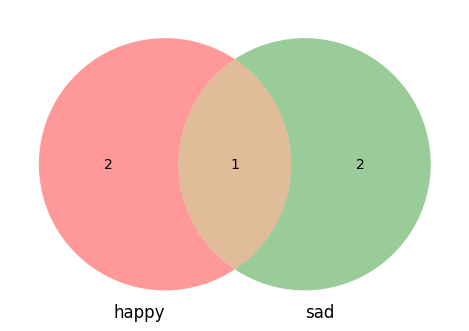

In [9]:
x = Compare({"happy": ["ecstatic", "bursting", "nostalgic"], "sad": ["down", "depressed", "nostalgic"]}, LABEL_BOTH_FACTORS=True)

By 2015, we have four collections and move to correspondence analysis.  

To analyse, I suggest a three pronged approach.

- HA: What does the horizontal axis mean?
- VA: What does the vertical axis mean?
- QUA: Can we name the quadrants?
- CLUS: What sources have clustered together

HA-VA-QUA-CLUS!

Below, try changing -4 to -3 to -2 to -1 to move forward in time from 2013.

['WAHR_ymmfire-ur', 'SFU_government_', 'SFU_bc_local_go', 'SFU_library_web', 'SFU_sfu_affilia', 'WAHR_panamapape', 'WAHR_exln42-all', 'SFU_ngos-urls.t', 'SFU_pkp-urls.tx']
[ 0.49267806  0.12434012  0.10332551  0.09743755  0.08215289  0.07119949
  0.02588292  0.00480227]


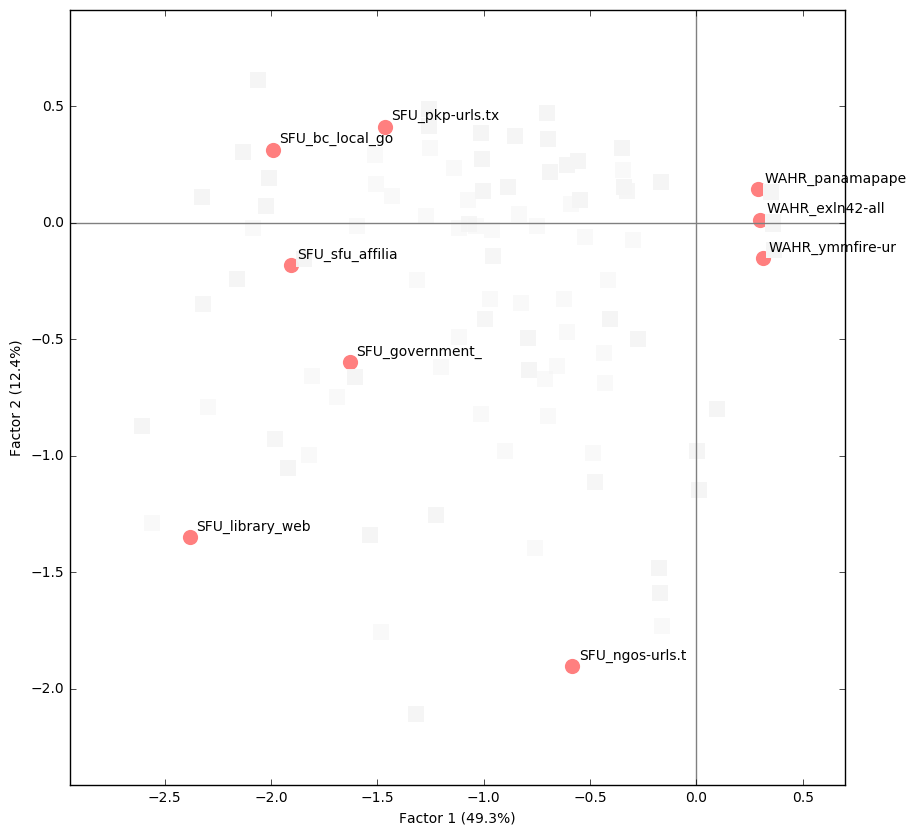

In [13]:
SFU = Compare(collection_var[-1])

According to this graph, a strong distinction exists for the VI News collection. Adding a dummy collection puts VI NEWS and trans_web on the same vertical axis but both collections have few connections to the MEDIA DUMMY.  This probably means that the "news" sites do not link frequently to the more popular news media sites.  

['WAHR_ymmfire-ur', 'SFU_government_', 'SFU_bc_local_go', 'MEDIADUMMY', 'SFU_library_web', 'SFU_sfu_affilia', 'WAHR_panamapape', 'WAHR_exln42-all', 'SFU_ngos-urls.t', 'SFU_pkp-urls.tx']
[ 0.4937896   0.16715108  0.12369857  0.1030097   0.09727766  0.08212252
  0.07118903  0.02588339  0.00480888]


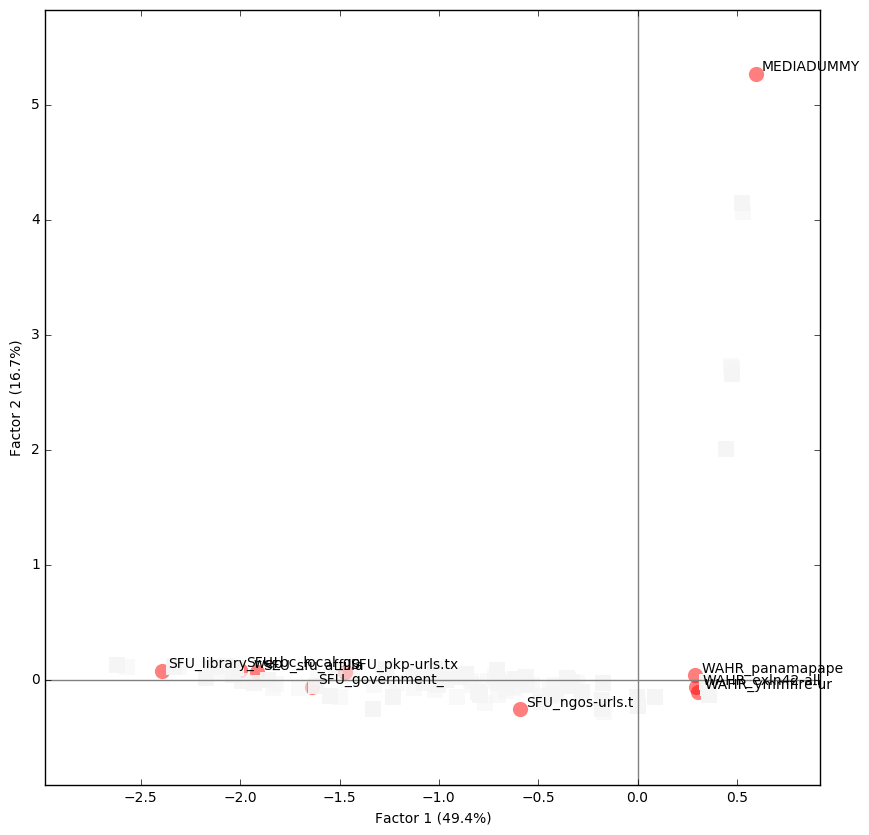

In [14]:
#collection_var[-3] = removekey(collection_var[-3], 'SOCIALMEDIA')
collection_var[-1]['MEDIADUMMY'] = newdict['2015']['DUMMY_MEDIA']

SFU = Compare(collection_var[-1])

['WAHR_ymmfire-ur', 'SFU_government_', 'SFU_bc_local_go', 'MEDIADUMMY', 'SFU_library_web', 'SFU_sfu_affilia', 'WAHR_panamapape', 'WAHR_exln42-all', 'SFU_ngos-urls.t', 'SFU_pkp-urls.tx']
[ 0.4937896   0.16715108  0.12369857  0.1030097   0.09727766  0.08212252
  0.07118903  0.02588339  0.00480888]


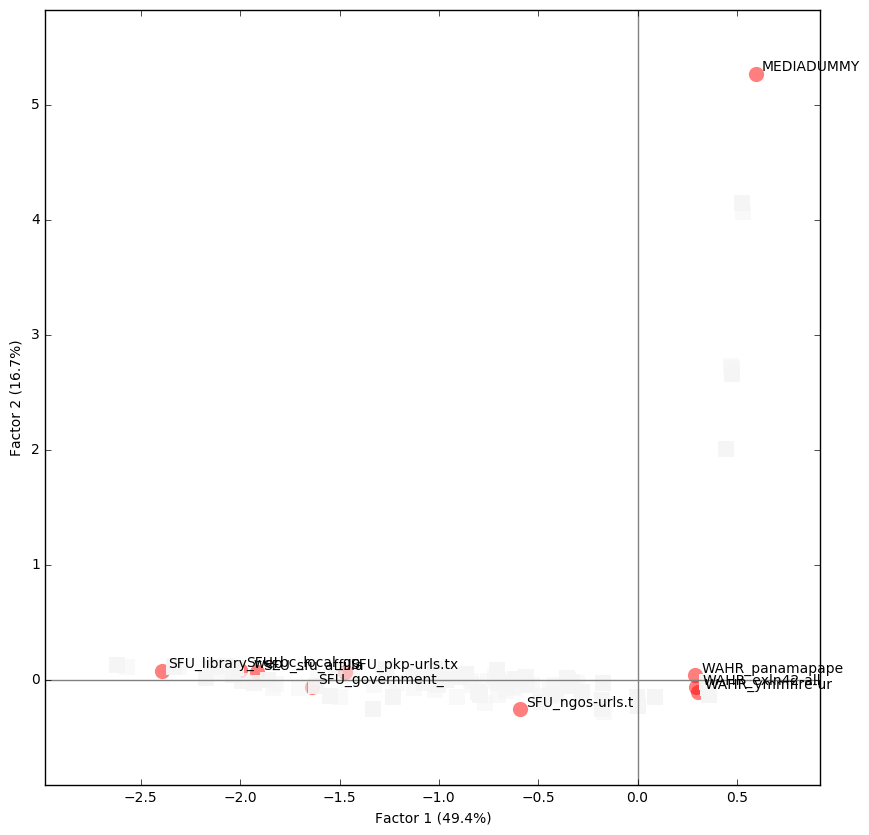

In [15]:
SFU = Compare(collection_var[-1])

Moving to 2016, we now see the WAHR Twitter collections included, which greatly expand the difference among the 
collections overall. So the collections are distinct from Twitter collections.

['WAHR_ymmfire-ur', 'SFU_government_', 'SFU_bc_local_go', 'MEDIADUMMY', 'SFU_library_web', 'SFU_sfu_affilia', 'WAHR_panamapape', 'WAHR_exln42-all', 'SFU_ngos-urls.t', 'SFU_pkp-urls.tx']
[ 0.4937896   0.16715108  0.12369857  0.1030097   0.09727766  0.08212252
  0.07118903  0.02588339  0.00480888]


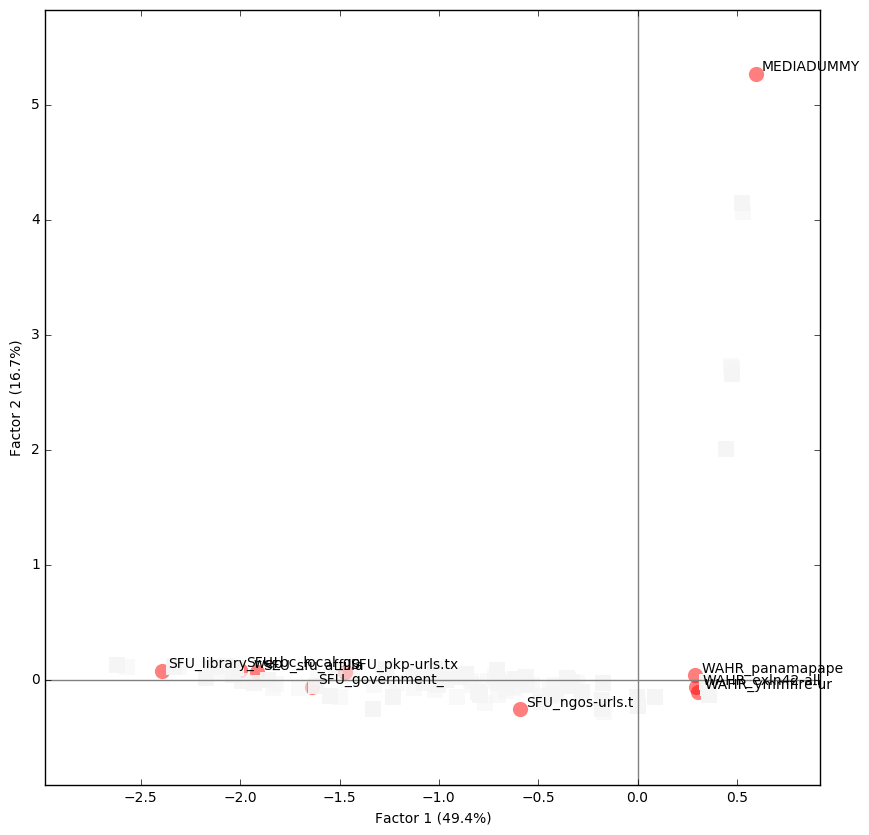

In [16]:
SFU = Compare(collection_var[-1])

Removing the Twitter examples, again we see that the collections are not very distinct in terms of url exchange.

['SFU_government_', 'SFU_bc_local_go', 'SFU_library_web', 'SFU_sfu_affilia', 'SFU_ngos-urls.t', 'SFU_pkp-urls.tx']
[ 0.12736224  0.10943493  0.08644274  0.05093726  0.00325496]


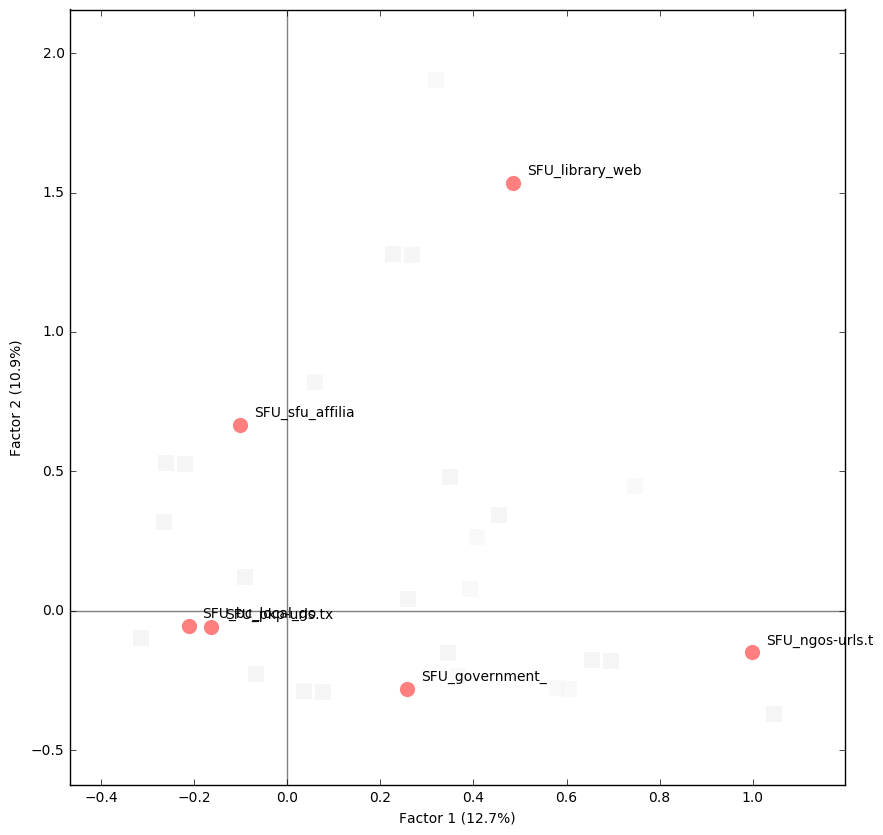

In [24]:
#collection_var[-1] = removekey(collection_var[-1], 'WAHR_ymmfire-ur')
#collection_var[-1] = removekey(collection_var[-1], 'WAHR_panamapape')
#collection_var[-1] = removekey(collection_var[-1], 'WAHR_exln42-all')
#collection_var[-1] = removekey(collection_var[-1], 'MEDIADUMMY')
Compare(collection_var[-1])


*Conclusion*: The web archive collections are quite similar in terms of url content. More research is necessary to determine why, but analysis of collection policies regarding web archives may be beneficial to decide whether the current approach is meeting organizational needs. The lack of distinction among the collections is an area of curiosity, due to a lack of internal diversity among the sources.

In [ ]:
TestDict1 = {'2009': {'c1': {'lk1', 'lk2', 'lk3'},
                     'c2': {'lk1', 'lk10', 'lk20', 'lk2'},
                     'c3': {'lk3', 'lk10', 'lk33', 'lk4'}},
            '2010': {'c1': {'lk3', 'lk5', 'lk6'},
                    'c3': {'lk10', 'lk9', 'lk7'}},
            '2011': {'c1': {'lk3', 'lk5', 'lk6'},
                    'c4': {'lk1', 'lk2', 'lk3'}},
            '2012': {'c1': {'lk1', 'lk99', 'lk6'}}
           }

#print(list(zip(*zip(TestDict['2009'])))